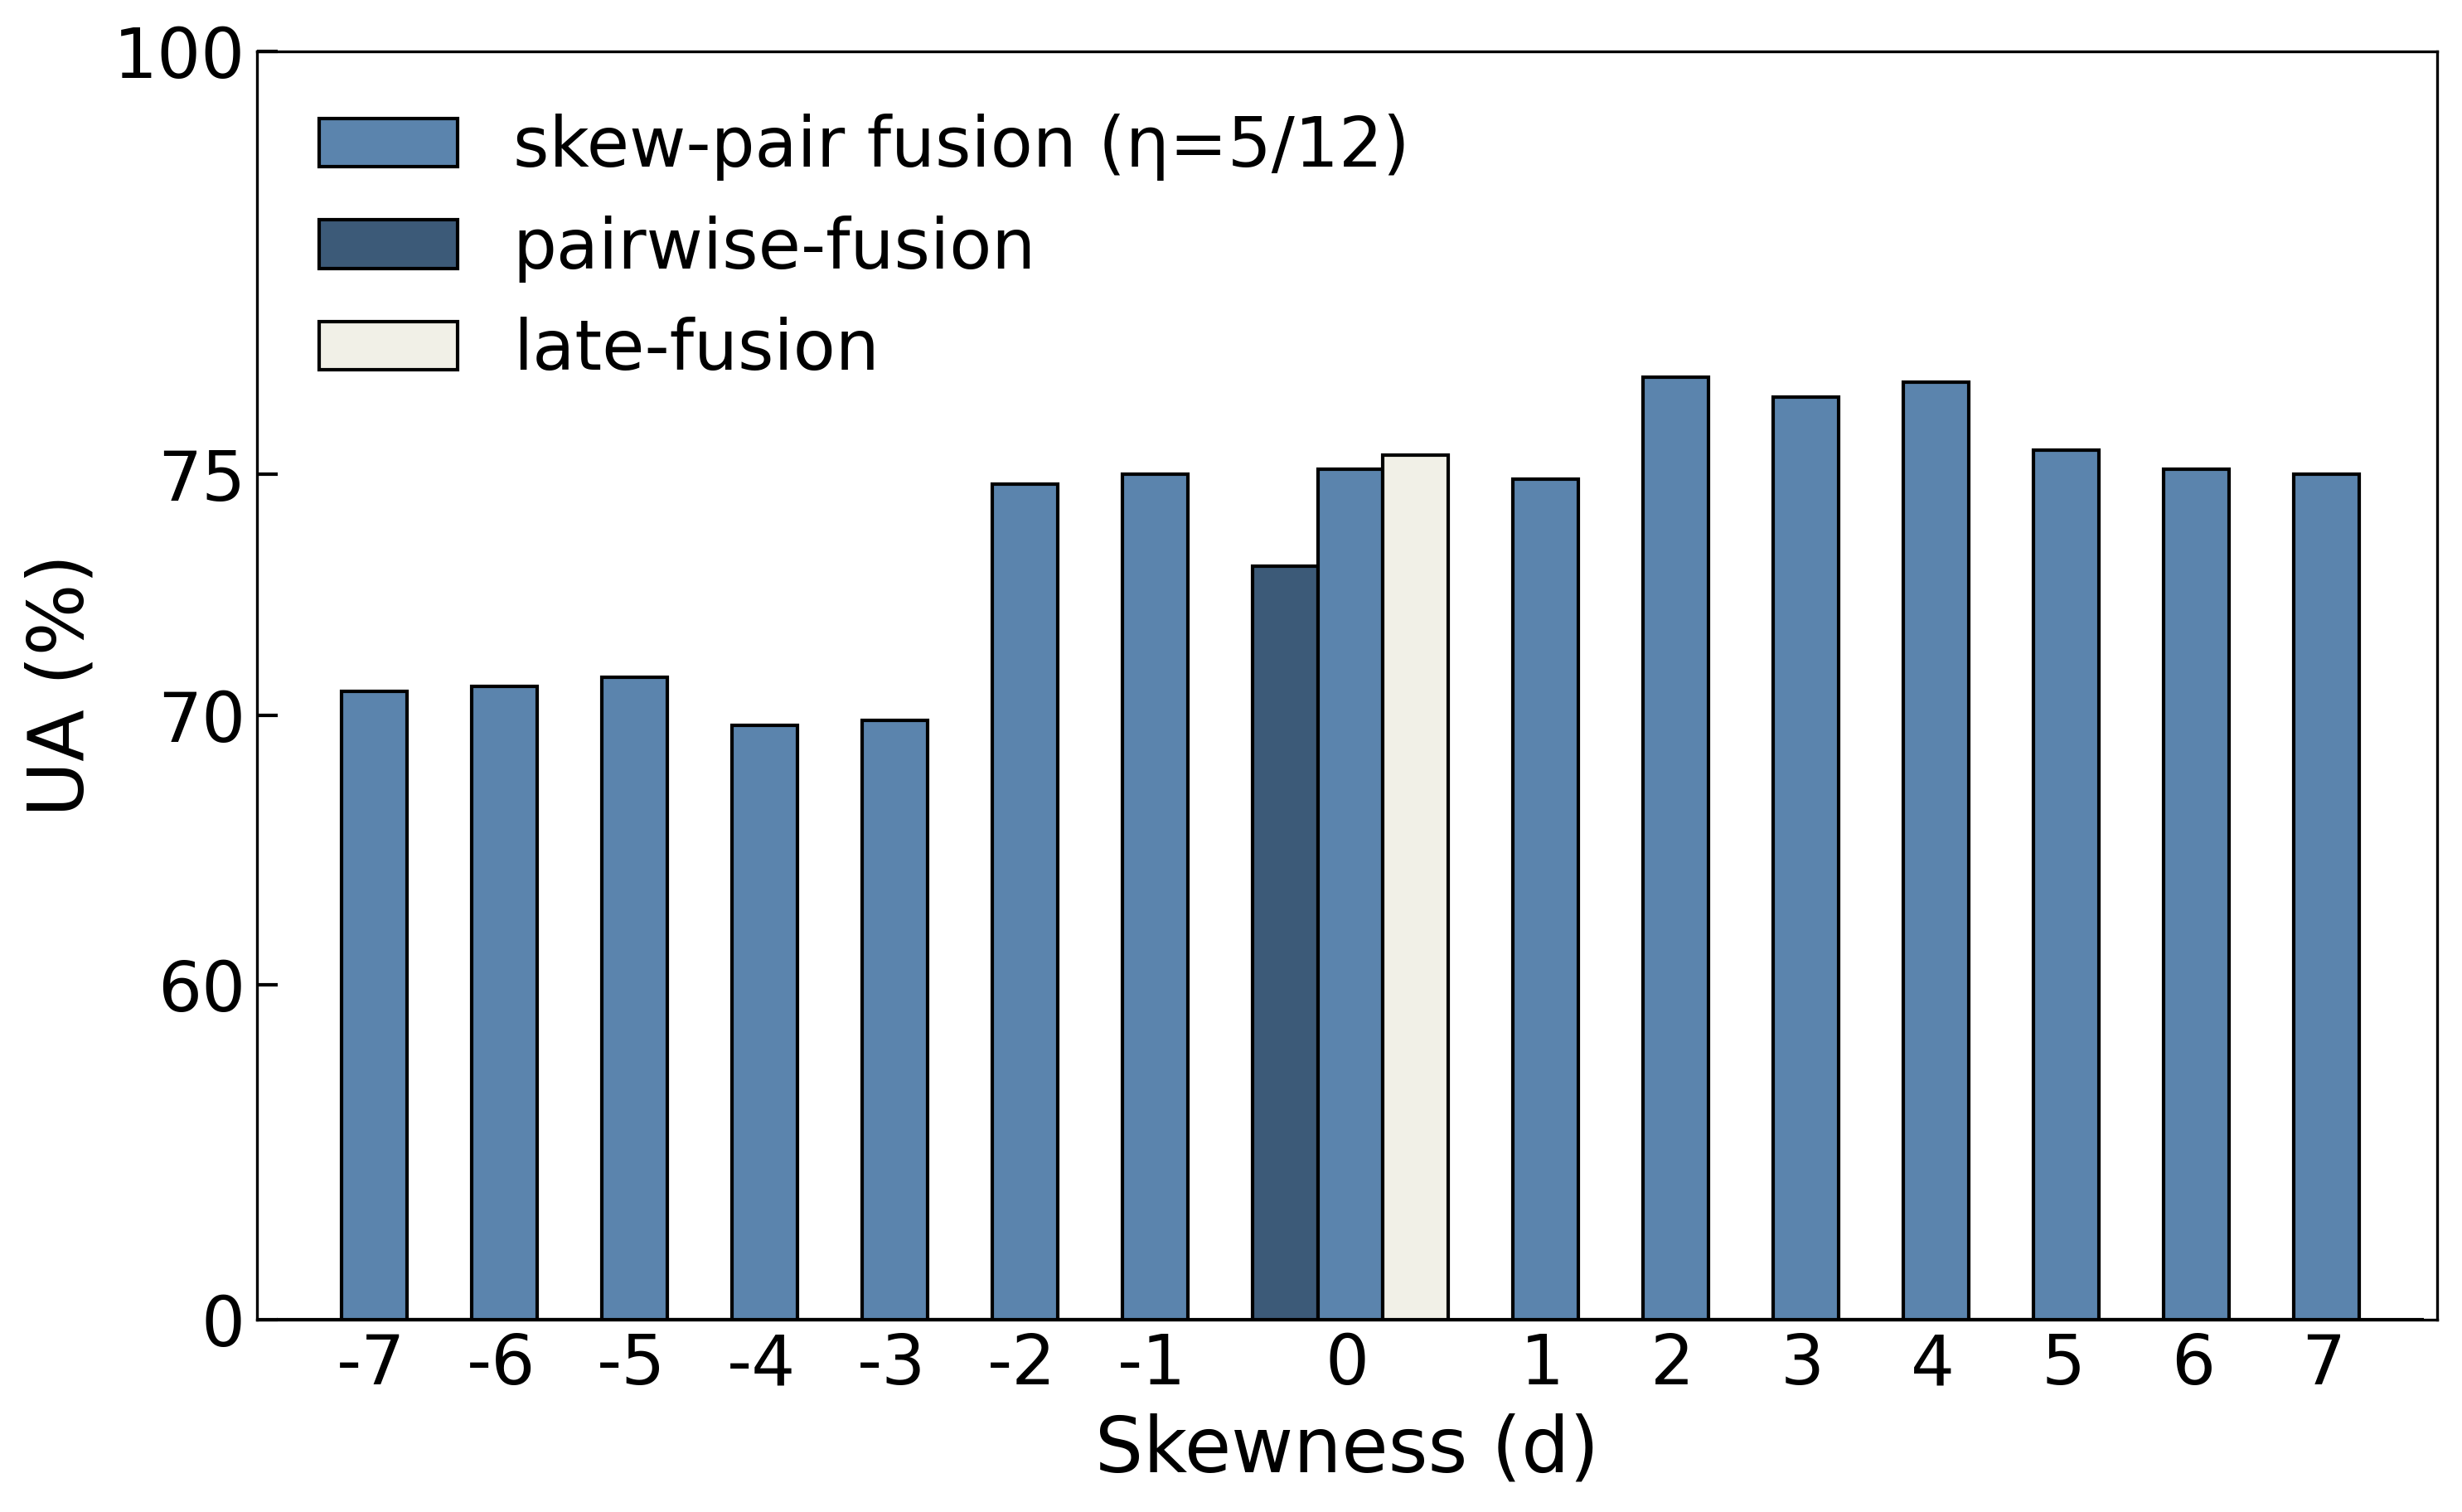

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # For custom legend lines

def custom_transform(y):
    # 0-65 maps to 0-6
    # 65-80 maps to 6-18
    # 80-100 maps to 18-21
    return np.where(y < 65, y * 6 / 65,
                    np.where(y < 80, 6 + (y - 65) * 12 / (80 - 65), 18 + (y - 80) * 3 / (100 - 80)))

def inverse_custom_transform(y):
    # Inverse transformation, mapping 0-6 back to 0-65
    # Mapping 6-18 back to 65-80
    # Mapping 18-21 back to 80-100
    return np.where(y < 6, y * 65 / 6,
                    np.where(y < 18, 65 + (y - 6) * (80 - 65) / 12, 80 + (y - 18) * (100 - 80) / 3))

# Your updated data and functions remain unchanged
# Your data
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'UA': [0, 0, 0, 0, 0, 0, 0,  73.1 ,0, 0, 0, 0, 0, 0, 0]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'UA': [70.5,70.6,70.8,69.8,69.9,74.8,75.0,75.1,74.9,77.0,76.6,76.9,75.5,75.1,75.0]
}
df2 = pd.DataFrame(data2)

data3 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'UA': [0, 0, 0, 0, 0, 0, 0,  75.4 ,0, 0, 0, 0, 0, 0, 0]
}
df3 = pd.DataFrame(data3)

colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# Plotting with the new color scheme
plt.figure(figsize=(10, 6.18), dpi=300)  # Adjust figure size

# Re-using the width and space adjustments
width = 0.5  # the width of the bars, reduced to make bars closer
space = 0.05  # additional space between bars
r1 = np.arange(len(df1['skewness']),  dtype=float)  # the label locations for the first dataset
r1[:7] -= 0.5
r1[8:] += 0.5
r2 = [x + width + space for x in r1]  # the label locations for the second dataset
r3 = [x + width for x in r2]  # the label locations for the third dataset


bars1 = plt.bar(r1+0.05, custom_transform(df1['UA']), color=colors[0], width=width, label='Pairwise(D3)',edgecolor='black', linewidth=1)
bars2 = plt.bar(r2, custom_transform(df2['UA']), color=colors[1], width=width, label='Skew-pair(D5)',edgecolor='black', linewidth=1)
bars3 = plt.bar(r3, custom_transform(df3['UA']), color=colors[2], width=width, label='Late-fusion',edgecolor='black', linewidth=1)

# Setting the labels and title
# plt.title('Fusion Statergy Comparison', fontsize=22)
plt.xlabel('Skewness (d)', fontsize=22)
plt.ylabel('UA (%)', fontsize=22)
adjusted_positions = [(r + width + (space / 2) - 0.5 if r < 7 else r + width + (space / 2) + 0.5 if r > 7 else r + width + (space / 2)) for r in range(len(df1['skewness']))]
plt.xticks(adjusted_positions, df1['skewness'])
plt.legend()

# for bars in [bars1, bars2, bars3]:
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:
#             plt.text(bar.get_x() + bar.get_width()/2, height,
#                      f'{inverse_custom_transform(height):.1f}',
#                      ha='center', va='bottom', fontsize=10)

plt.xlim(min(r1) - 0.35, max(r3) + 0.35)

# Custom legend
plt.legend([bars2, bars1, bars3], ['skew-pair fusion (η=5/12)', 'pairwise-fusion', 'late-fusion'],
           frameon=False, loc='upper left', fontsize=20)

# Formatting Y-axis
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{inverse_custom_transform(x):.0f}"))
actual_ticks = [0, 60, 70, 75, 100]
transformed_ticks = [custom_transform(value) for value in actual_ticks]
plt.yticks(transformed_ticks)

plt.gca().tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=20)
plt.tick_params(axis='x', which='both', bottom=False)
plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 5.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 5.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 5.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 5.tif', format='tif')
plt.show()

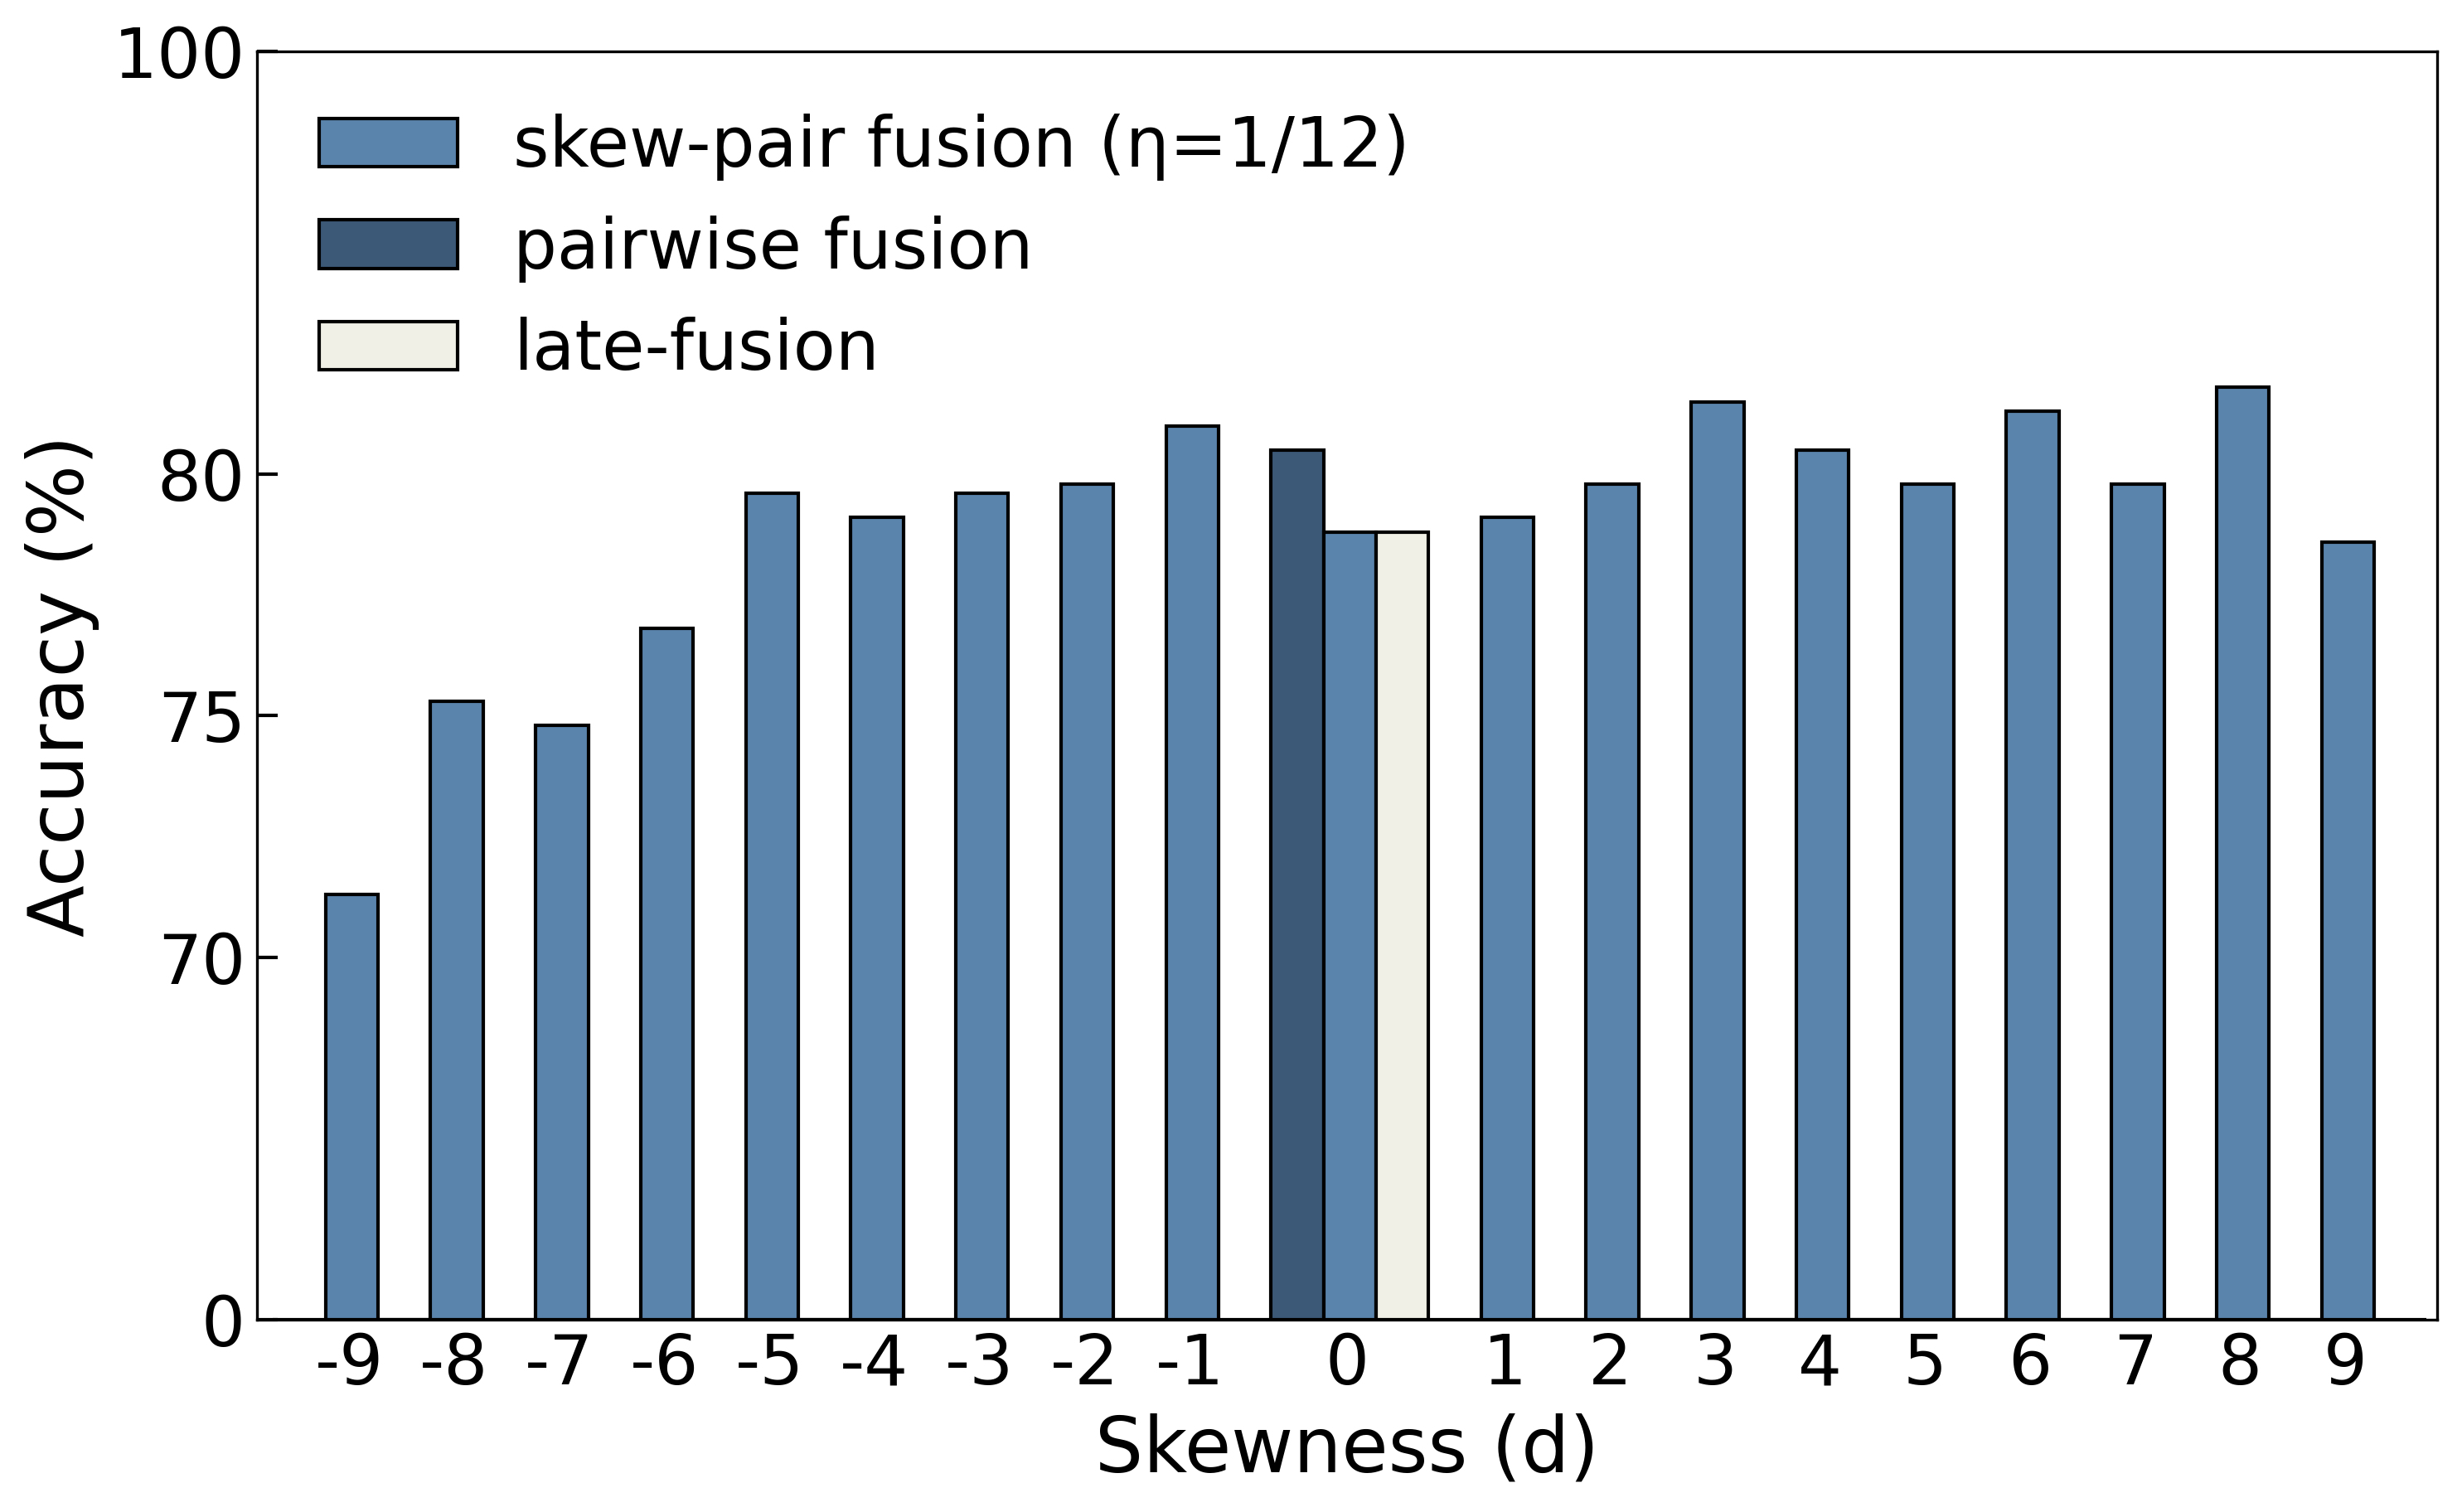

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # 用于自定义图例线

def custom_transform(y):
    # 0-70 映射到 0-6
    # 70-85 映射到 6-18
    # 85-100 映射到 18-21
    return np.where(y < 70, y * 6 / 70,
                    np.where(y < 85, 6 + (y - 70) * 12 / 15,
                             18 + (y - 85) * 3 / 15))

def inverse_custom_transform(y):
    # 0-6 映射回 0-70
    # 6-18 映射回 70-85
    # 18-21 映射回 85-100
    return np.where(y < 6, y * 70 / 6,
                    np.where(y < 18, 70 + (y - 6) * 15 / 12,
                             85 + (y - 18) * 15 / 3))

# 您的数据保持不变
data1 = {
    'skewness': [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 80.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'roc_auc': [71.3, 75.3, 74.8, 76.8, 79.6, 79.1, 79.6, 79.8, 81.0, 78.8, 79.1, 79.8, 81.5, 80.5, 79.8, 81.3, 79.8, 81.8, 78.6]
}
df2 = pd.DataFrame(data2)

data3 = {
    'skewness': [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 0, 0, 78.8, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}
df3 = pd.DataFrame(data3)

colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# 绘图
plt.figure(figsize=(10, 6.18), dpi=300)  # 调整图像大小

# 设置宽度和间隔
width = 0.5  # 柱状图的宽度
space = 0.05  # 柱状图之间的间隔
r1 = np.arange(len(df1['skewness']), dtype=float)
r1[:9] -= 0.5
r1[10:] += 0.5
r2 = [x + width + space for x in r1]
r3 = [x + width for x in r2]

bars1 = plt.bar(r1 + 0.05, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='Pairwise(D3)', edgecolor='black', linewidth=1)
bars2 = plt.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='Skew-pair(D5)', edgecolor='black', linewidth=1)
bars3 = plt.bar(r3, custom_transform(df3['roc_auc']), color=colors[2], width=width, label='Late-fusion', edgecolor='black', linewidth=1)

# 设置标签和标题
plt.xlabel('Skewness (d)', fontsize=22)
plt.ylabel('Accuracy (%)', fontsize=22)
adjusted_positions = [
    (r + width + (space / 2) - 0.5 if r < 9 else r + width + (space / 2) + 0.5 if r > 9 else r + width + (space / 2))
    for r in range(len(df1['skewness']))
]
plt.xticks(adjusted_positions, df1['skewness'])
plt.xlim(min(r1) - 0.35, max(r3) + 0.35)

# 自定义图例
plt.legend([bars2, bars1, bars3], ['skew-pair fusion (η=1/12)', 'pairwise fusion', 'late-fusion'], frameon=False, loc='upper left', fontsize=20)

# 格式化 Y 轴
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(x):.0f}"))
actual_ticks = [0, 70, 75, 80, 100]
transformed_ticks = [custom_transform(value) for value in actual_ticks]
plt.yticks(transformed_ticks, actual_ticks)

plt.gca().tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=20)
plt.tick_params(axis='x', which='both', bottom=False)
plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 6.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 6.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 6.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 6.tif', format='tif')
plt.show()


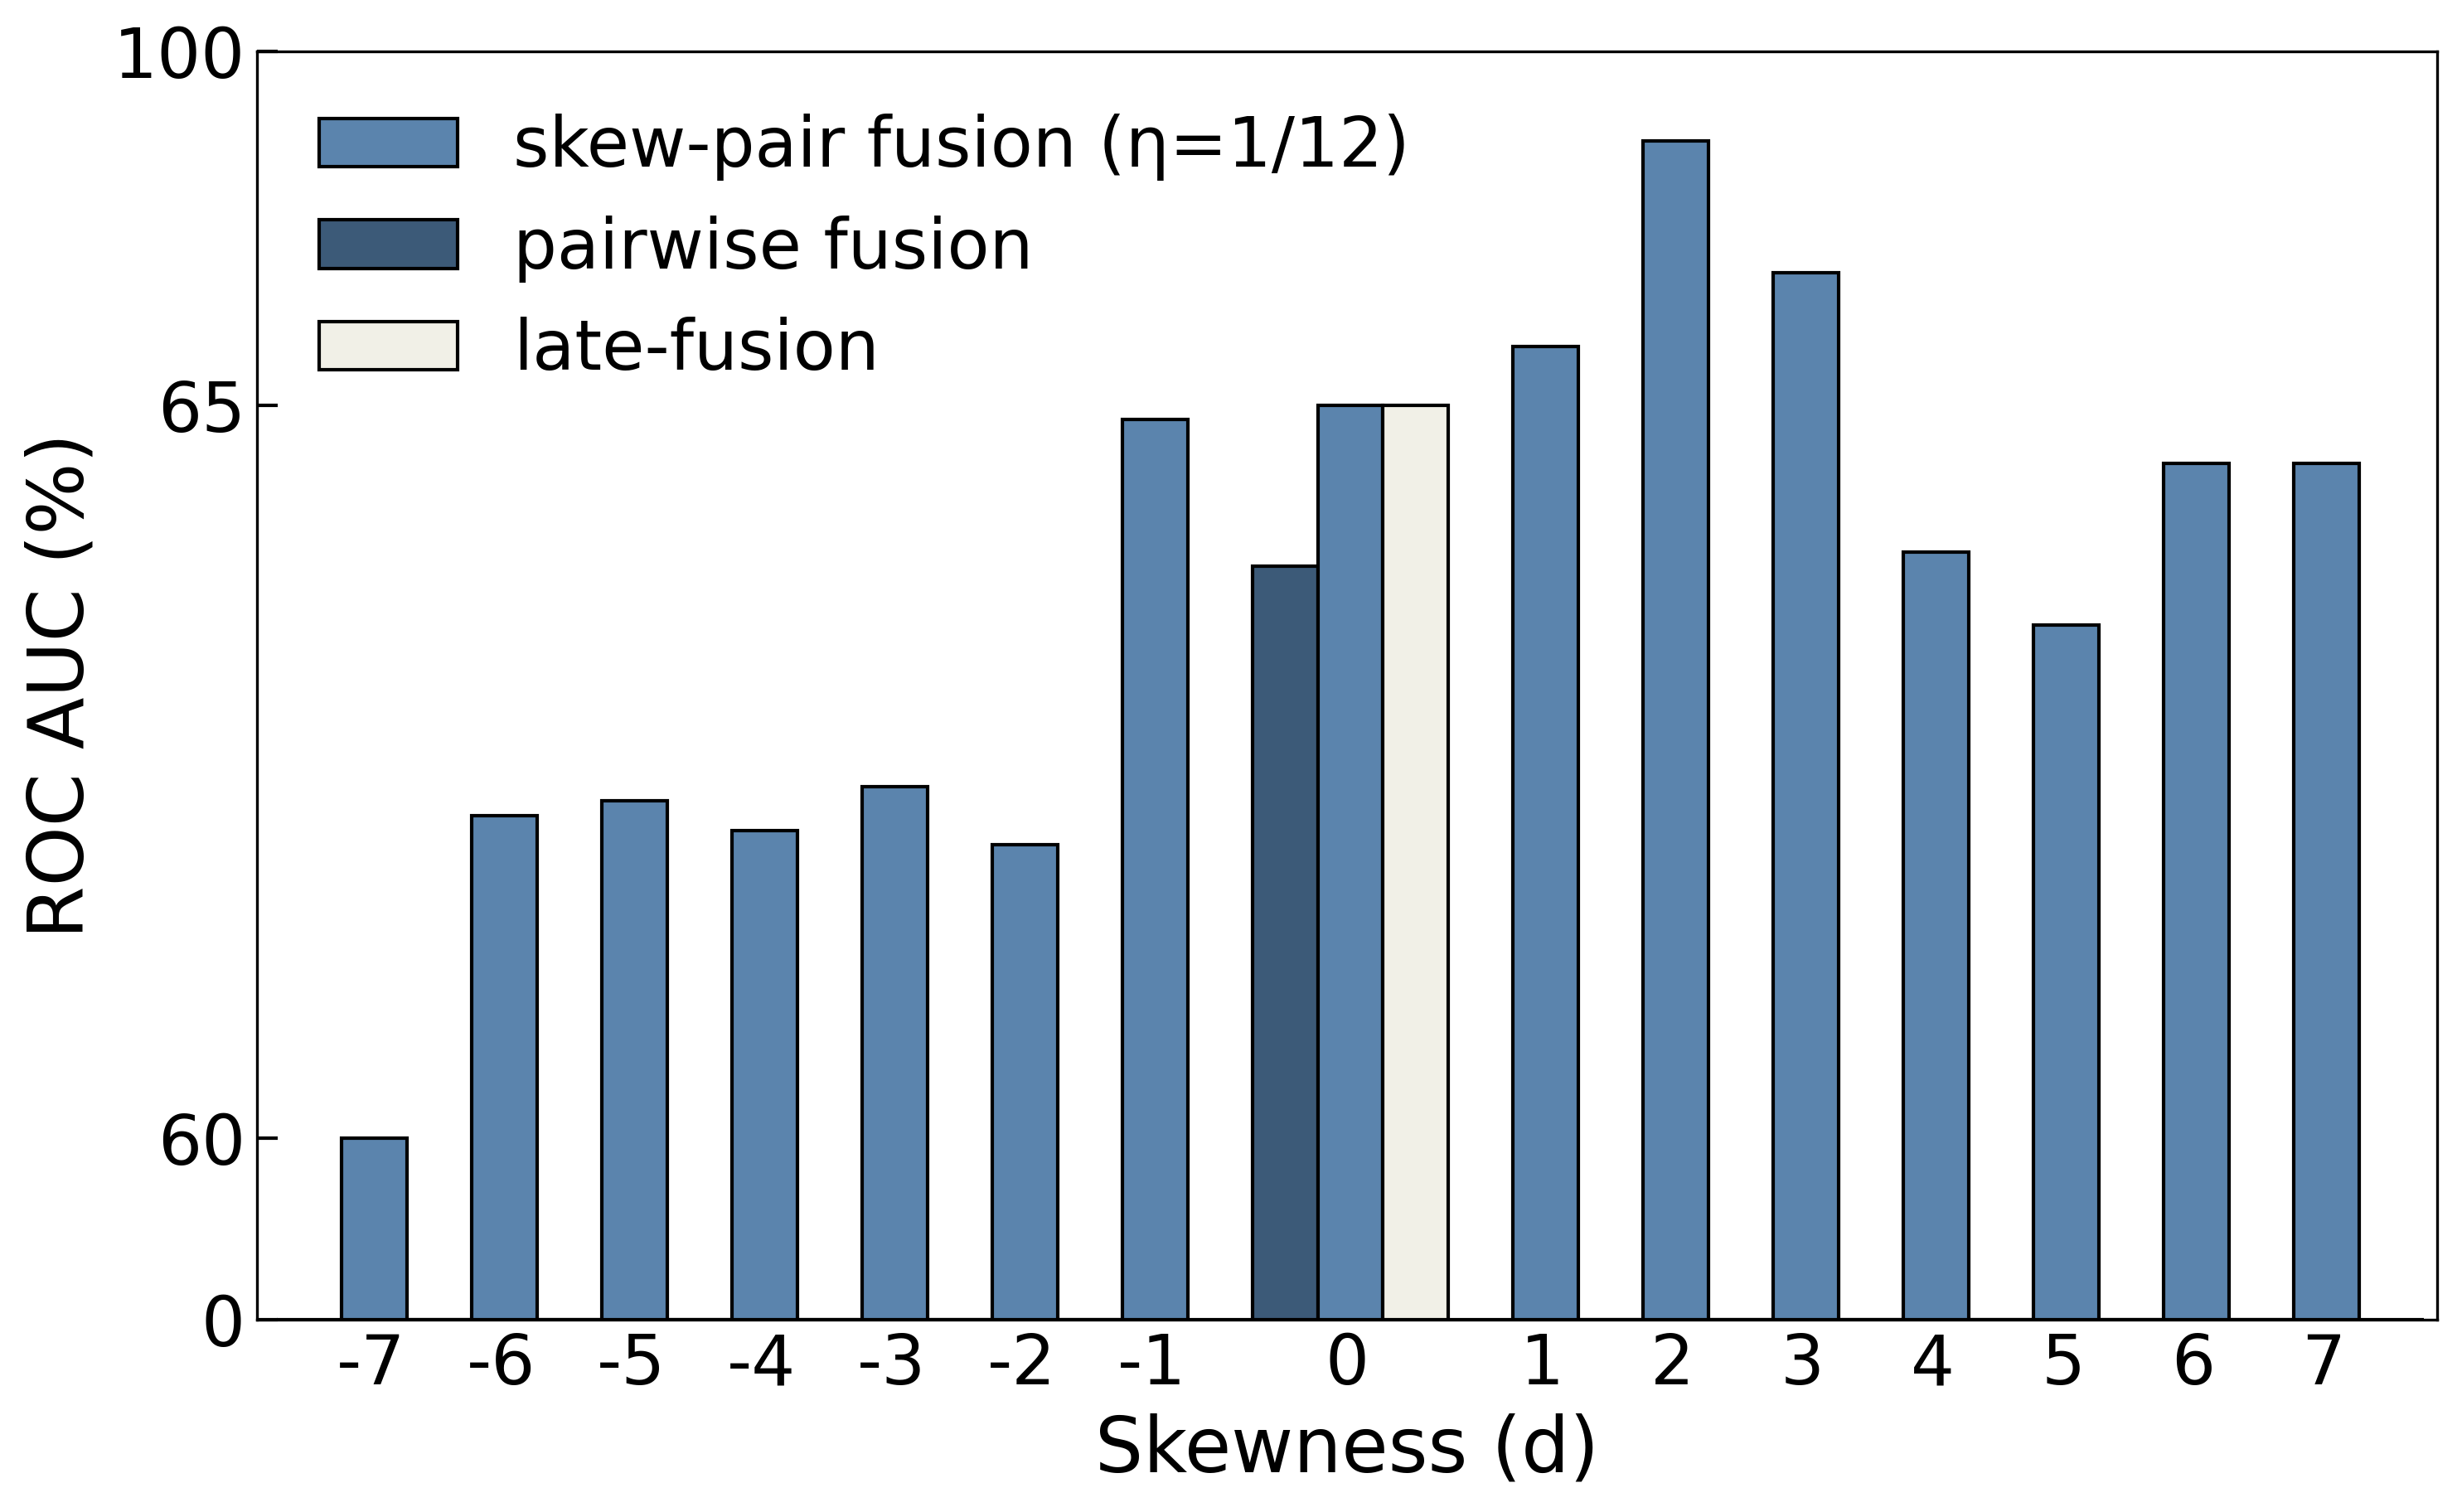

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # For custom legend lines

def custom_transform(y):
    # 0-60 maps to 0-3
    # 60-67 maps to 3-20
    # 67-100 maps to 20-21
    return np.where(y < 60, y * 3 / 60,
                    np.where(y < 67, 3 + (y - 60) * 17 / (67 - 60), 20 + (y - 67) * 1 / (100 - 67)))

def inverse_custom_transform(y):
    # Inverse transformation, mapping 0-3 back to 0-60
    # Mapping 3-20 back to 60-67
    # Mapping 20-21 back to 67-100
    return np.where(y < 3, y * 60 / 3,
                    np.where(y < 20, 60 + (y - 3) * (67 - 60) / 17, 67 + (y - 20) * (100 - 67) / 1))

# Your updated data and functions remain unchanged
# Your data
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0,  63.9, 0, 0, 0, 0, 0, 0, 0]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [60.0, 62.2, 62.3, 62.1, 62.4, 62.0, 64.9, 65.0, 65.4, 66.8, 65.9, 64.0, 63.5, 64.6, 64.6]
}
df2 = pd.DataFrame(data2)

data3 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0,  65 ,0, 0, 0, 0, 0, 0, 0]
}
df3 = pd.DataFrame(data3)

colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# Plotting with the new color scheme
plt.figure(figsize=(10, 6.18), dpi=300)  # Adjust figure size

# Re-using the width and space adjustments
width = 0.5  # the width of the bars, reduced to make bars closer
space = 0.05  # additional space between bars
r1 = np.arange(len(df1['skewness']),  dtype=float)  # the label locations for the first dataset
r1[:7] -= 0.5
r1[8:] += 0.5
r2 = [x + width + space for x in r1]  # the label locations for the second dataset
r3 = [x + width for x in r2]  # the label locations for the third dataset

bars1 = plt.bar(r1+0.05, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='Pairwise(D3)',edgecolor='black', linewidth=1)
bars2 = plt.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='Skew-pair(D5)',edgecolor='black', linewidth=1)
bars3 = plt.bar(r3, custom_transform(df3['roc_auc']), color=colors[2], width=width, label='Late-fusion',edgecolor='black', linewidth=1)

# Setting the labels and title
# plt.title('Fusion Statergy Comparison', fontsize=22)
plt.xlabel('Skewness (d)', fontsize=22)
plt.ylabel('ROC AUC (%)', fontsize=22)
adjusted_positions = [(r + width + (space / 2) - 0.5 if r < 7 else r + width + (space / 2) + 0.5 if r > 7 else r + width + (space / 2)) for r in range(len(df1['skewness']))]
plt.xticks(adjusted_positions, df1['skewness'])
plt.legend()

# for bars in [bars1, bars2, bars3]:
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:
#             plt.text(bar.get_x() + bar.get_width()/2, height,
#                      f'{inverse_custom_transform(height):.1f}',
#                      ha='center', va='bottom', fontsize=10)

plt.xlim(min(r1) - 0.35, max(r3) + 0.35)

# Custom legend
plt.legend([bars2, bars1, bars3], ['skew-pair fusion (η=1/12)', 'pairwise fusion', 'late-fusion'],
           frameon=False, loc='upper left', fontsize=20)

# Formatting Y-axis
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{inverse_custom_transform(x):.0f}"))
actual_ticks = [0, 60, 65, 100]
transformed_ticks = [custom_transform(value) for value in actual_ticks]
plt.yticks(transformed_ticks)

plt.gca().tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=20)
plt.tick_params(axis='x', which='both', bottom=False)
plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 7.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 7.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 7.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 7.tif', format='tif')
plt.show()

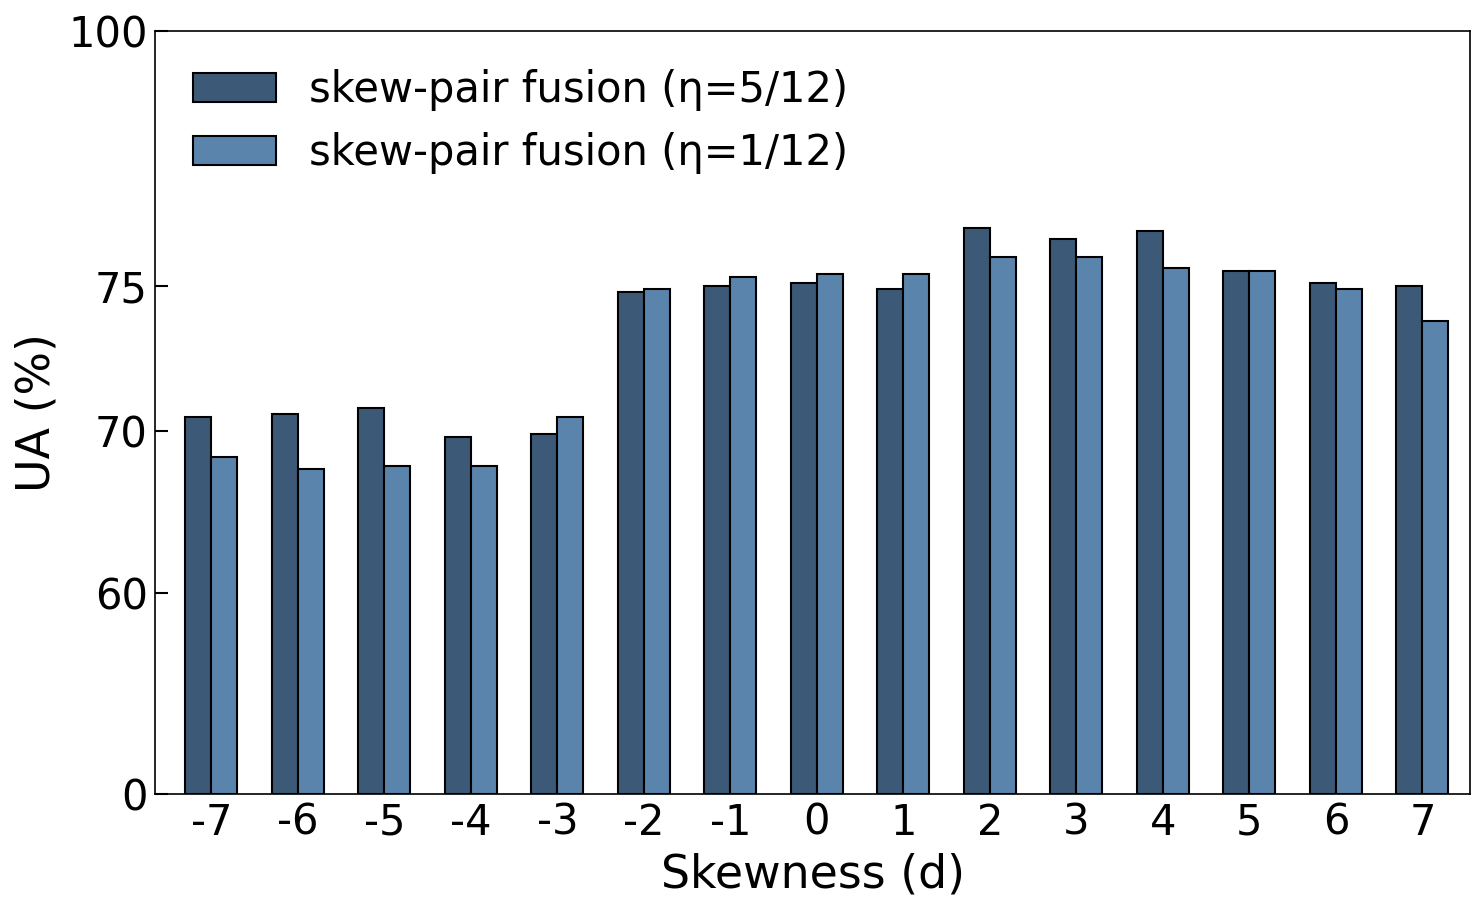

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # For custom legend lines

# def custom_transform(y):
#     # 0-68 maps to 0-3
#     # 68-80 maps to 3-20
#     # 80-100 maps to 20-21
#     return np.where(y < 68, y * 3 / 68,
#                     np.where(y < 80, 3 + (y - 68) * 17 / (80 - 68), 20 + (y - 80) * 1 / (100 - 80)))

# def inverse_custom_transform(y):
#     # Inverse transformation, mapping 0-3 back to 0-68
#     # Mapping 3-20 back to 68-80
#     # Mapping 20-21 back to 80-100
#     return np.where(y < 3, y * 68 / 3,
#                     np.where(y < 20, 68 + (y - 3) * (80 - 68) / 17, 80 + (y - 20) * (100 - 80) / 1))

def custom_transform(y):
    # 0-65 maps to 0-6
    # 65-80 maps to 6-18
    # 80-100 maps to 18-21
    return np.where(y < 65, y * 6 / 65,
                    np.where(y < 80, 6 + (y - 65) * 12 / (80 - 65), 18 + (y - 80) * 3 / (100 - 80)))

def inverse_custom_transform(y):
    # Inverse transformation, mapping 0-6 back to 0-65
    # Mapping 6-18 back to 65-80
    # Mapping 18-21 back to 80-100
    return np.where(y < 6, y * 65 / 6,
                    np.where(y < 18, 65 + (y - 6) * (80 - 65) / 12, 80 + (y - 18) * (100 - 80) / 3))


colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Your updated data and functions remain unchanged
# Your data
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [70.5,70.6,70.8,69.8,69.9,74.8,75.0,75.1,74.9,77.0,76.6,76.9,75.5,75.1,75.0]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [69.1,68.7,68.8,68.8,70.5,74.9,75.3,75.4,75.4,76.0,76.0,75.6,75.5,74.9,73.8]
}
df2 = pd.DataFrame(data2)

# Updated color scheme from your image

# Plotting with the new color scheme
plt.figure(figsize=(10, 6.18), dpi=150)  # Adjust figure size

width = 0.3  # the width of the bars, reduced to fit three sets
r1 = np.arange(len(df1['skewness']))  # the label locations for the first dataset
r2 = [x + width for x in r1]  # the label locations for the second dataset

bars1 = plt.bar(r1, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='skew-pair fusion (η=5/12)', edgecolor='black', linewidth=1)
bars2 = plt.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='skew-pair fusion (η=1/12)', edgecolor='black', linewidth=1)


# Setting the labels and title
# plt.title('η=3/12 vs. η=1/12 Comparison', fontsize=22)
plt.xlabel('Skewness (d)', fontsize=22)
plt.ylabel('UA (%)', fontsize=22)
plt.xticks([r + width/2 for r in range(len(df1['skewness']))], df1['skewness'])
plt.xlim(min(r1) - 0.5, max(r1) + 0.7)  # Adjusting x-limits to reduce the empty space on the sides
# 自定义图例位置
plt.legend(loc = 'upper left', frameon=False, fontsize=20)  # 图例将放在图的正中央

# for bars in [bars1, bars2]:
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:
#             plt.text(bar.get_x() + bar.get_width()/2, height,
#                      f'{inverse_custom_transform(height):.1f}',
#                      ha='center', va='bottom', fontsize=4.5)

# Formatting Y-axis using your custom transformation functions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(np.array([x]))[0]:.0f}"))
# Adjusting y-ticks handling
actual_ticks = [0,60, 70, 75, 100]  # Actual values you want to display
transformed_ticks = [custom_transform(np.array([value]))[0] for value in actual_ticks]  # Apply transformation individually
plt.yticks(transformed_ticks, actual_ticks)  # Set the custom ticks with actual values
plt.yticks(transformed_ticks, actual_ticks)  # Set the custom ticks
plt.gca().tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=20)
plt.tick_params(axis='x',          # 只影响x轴
                which='both',      # 主刻度和次刻度都被影响
                bottom=False) # 不显示刻度标签
plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 10.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 10.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 10.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 10.tif', format='tif')
plt.show()

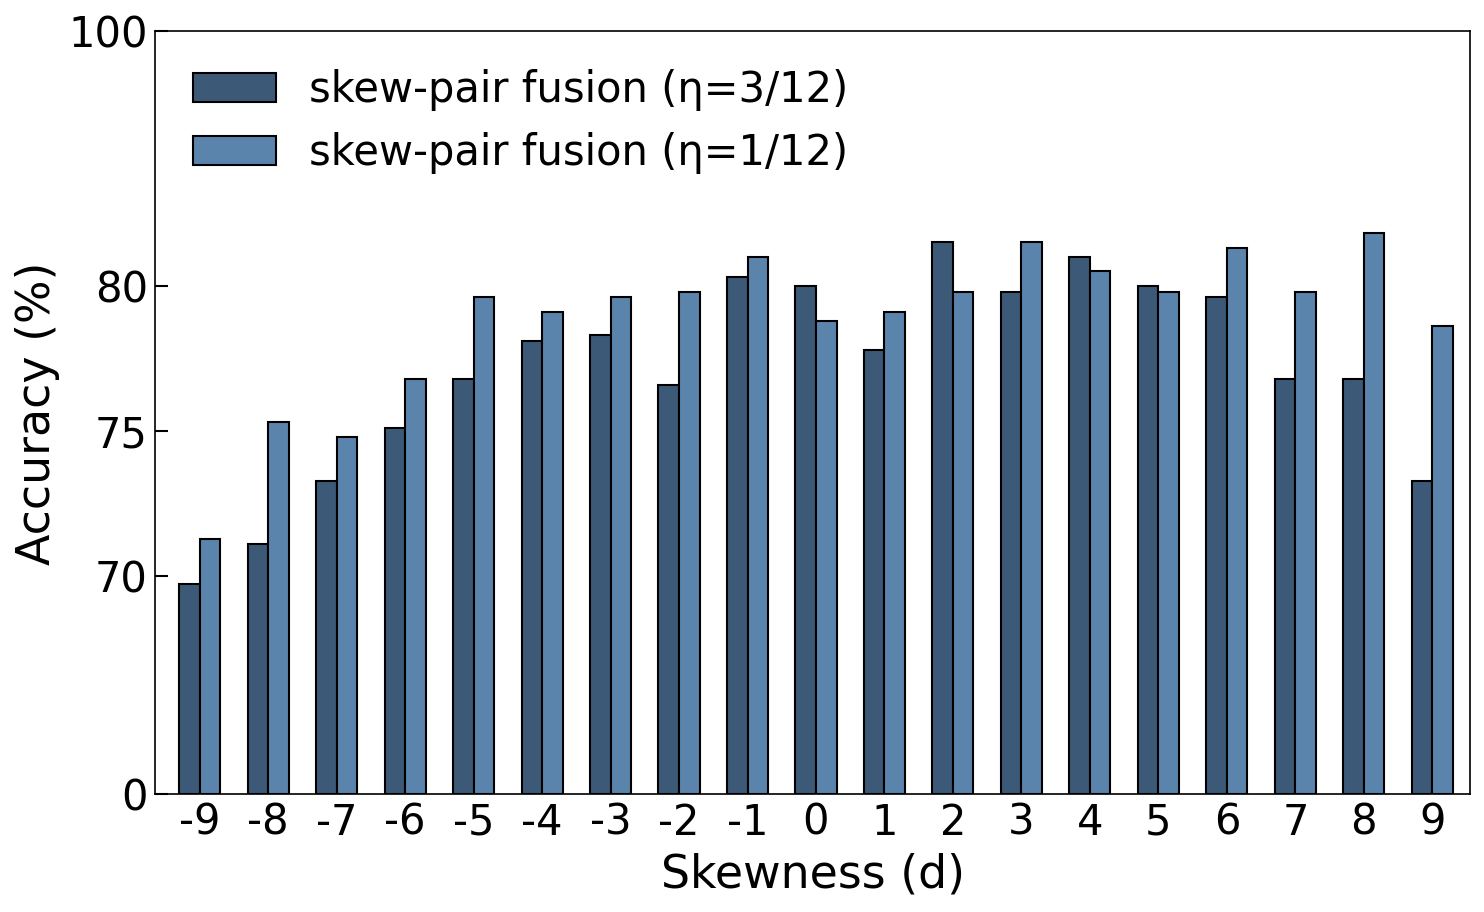

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # For custom legend lines

# def custom_transform(y):
#     # 0-68 maps to 0-3
#     # 68-80 maps to 3-20
#     # 80-100 maps to 20-21
#     return np.where(y < 68, y * 3 / 68,
#                     np.where(y < 80, 3 + (y - 68) * 17 / (80 - 68), 20 + (y - 80) * 1 / (100 - 80)))

# def inverse_custom_transform(y):
#     # Inverse transformation, mapping 0-3 back to 0-68
#     # Mapping 3-20 back to 68-80
#     # Mapping 20-21 back to 80-100
#     return np.where(y < 3, y * 68 / 3,
#                     np.where(y < 20, 68 + (y - 3) * (80 - 68) / 17, 80 + (y - 20) * (100 - 80) / 1))

def custom_transform(y):
    # 0-70 映射到 0-6
    # 70-85 映射到 6-18
    # 85-100 映射到 18-21
    return np.where(y < 70, y * 6 / 70,
                    np.where(y < 85, 6 + (y - 70) * 12 / 15,
                             18 + (y - 85) * 3 / 15))

def inverse_custom_transform(y):
    # 0-6 映射回 0-70
    # 6-18 映射回 70-85
    # 18-21 映射回 85-100
    return np.where(y < 6, y * 70 / 6,
                    np.where(y < 18, 70 + (y - 6) * 15 / 12,
                             85 + (y - 18) * 15 / 3))



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Your updated data and functions remain unchanged
# Your data
data1 = {
    'skewness': [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'roc_auc': [67.6, 71.1, 73.3, 75.1, 76.8, 78.1, 78.3, 76.6, 80.3, 80.0, 77.8, 81.5, 79.8, 81.0, 80.0, 79.6, 76.8, 76.8, 73.3]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'roc_auc': [71.3, 75.3, 74.8, 76.8, 79.6, 79.1, 79.6, 79.8, 81.0, 78.8, 79.1, 79.8, 81.5, 80.5, 79.8, 81.3, 79.8, 81.8, 78.6]
}
df2 = pd.DataFrame(data2)

colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# Updated color scheme from your image

# Plotting with the new color scheme
plt.figure(figsize=(10, 6.18), dpi=150)  # Adjust figure size

width = 0.3  # the width of the bars, reduced to fit three sets
r1 = np.arange(len(df1['skewness']))  # the label locations for the first dataset
r2 = [x + width for x in r1]  # the label locations for the second dataset

bars1 = plt.bar(r1, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='skew-pair fusion (η=3/12)', edgecolor='black', linewidth=1)
bars2 = plt.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='skew-pair fusion (η=1/12)', edgecolor='black', linewidth=1)


# Setting the labels and title
# plt.title('η=3/12 vs. η=1/12 Comparison', fontsize=22)
plt.xlabel('Skewness (d)', fontsize=22)
plt.ylabel('Accuracy (%)', fontsize=22)
plt.xticks([r + width/2 for r in range(len(df1['skewness']))], df1['skewness'])
plt.xlim(min(r1) - 0.5, max(r1) + 0.7)  # Adjusting x-limits to reduce the empty space on the sides
# 自定义图例位置
plt.legend(loc = 'upper left', frameon=False, fontsize=20)  # 图例将放在图的正中央

# for bars in [bars1, bars2]:
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:
#             plt.text(bar.get_x() + bar.get_width()/2, height,
#                      f'{inverse_custom_transform(height):.1f}',
#                      ha='center', va='bottom', fontsize=4.5)

# Formatting Y-axis using your custom transformation functions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(np.array([x]))[0]:.0f}"))
# Adjusting y-ticks handling
actual_ticks = [0, 70, 75, 80, 100]
transformed_ticks = [custom_transform(value) for value in actual_ticks]
plt.yticks(transformed_ticks, actual_ticks)
plt.yticks(transformed_ticks, actual_ticks)  # Set the custom ticks
plt.gca().tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=20)
plt.tick_params(axis='x',          # 只影响x轴
                which='both',      # 主刻度和次刻度都被影响
                bottom=False) # 不显示刻度标签
plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 11.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 11.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 11.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 11.tif', format='tif')
plt.show()

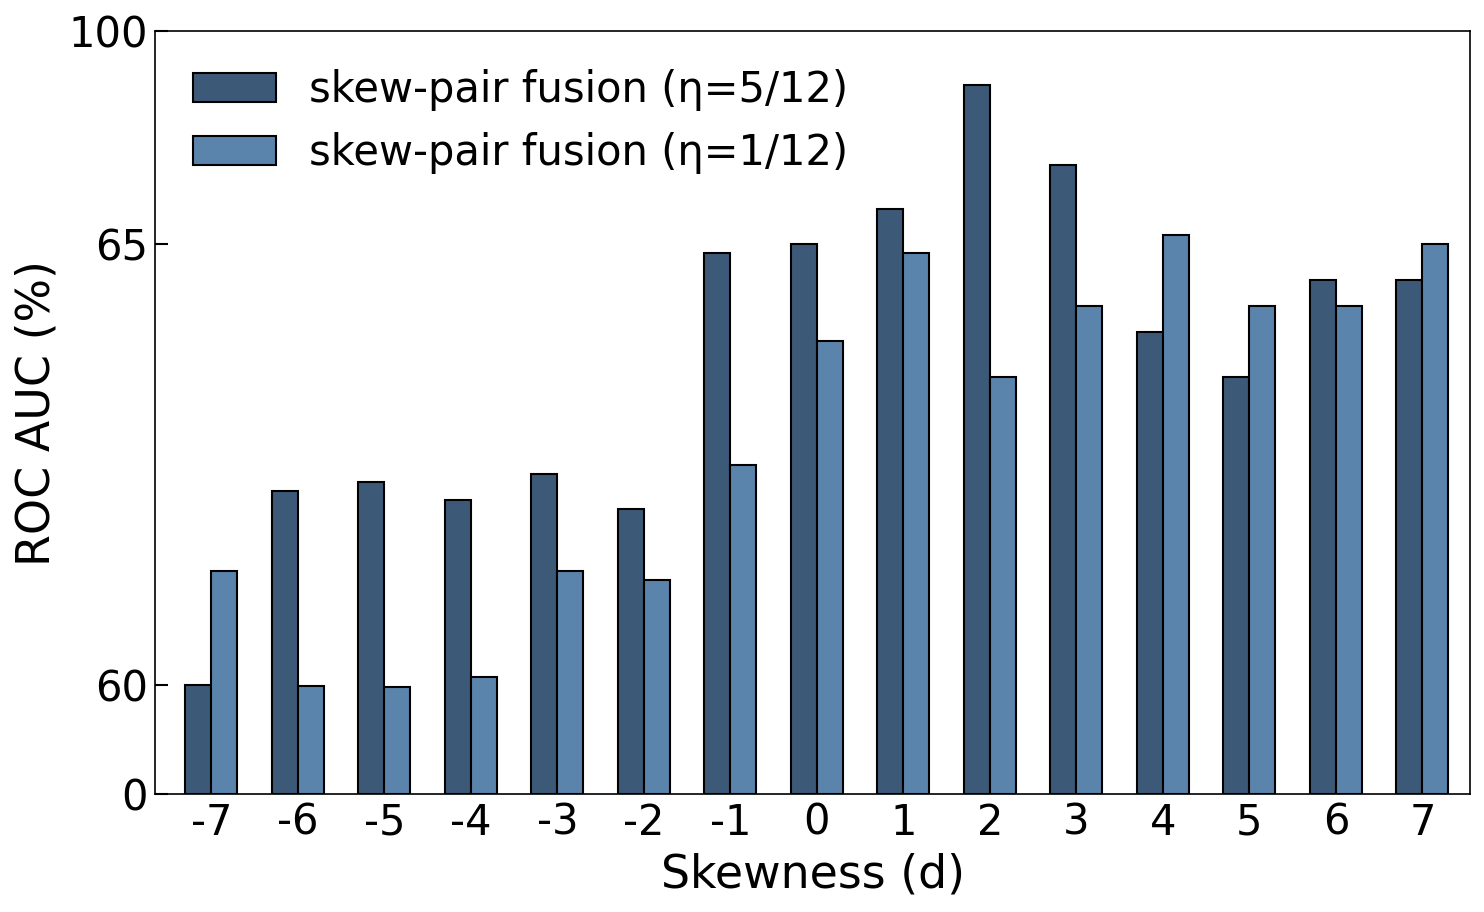

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # For custom legend lines

# def custom_transform(y):
#     # 0-68 maps to 0-3
#     # 68-80 maps to 3-20
#     # 80-100 maps to 20-21
#     return np.where(y < 68, y * 3 / 68,
#                     np.where(y < 80, 3 + (y - 68) * 17 / (80 - 68), 20 + (y - 80) * 1 / (100 - 80)))

# def inverse_custom_transform(y):
#     # Inverse transformation, mapping 0-3 back to 0-68
#     # Mapping 3-20 back to 68-80
#     # Mapping 20-21 back to 80-100
#     return np.where(y < 3, y * 68 / 3,
#                     np.where(y < 20, 68 + (y - 3) * (80 - 68) / 17, 80 + (y - 20) * (100 - 80) / 1))

def custom_transform(y):
    # 0-60 maps to 0-3
    # 60-67 maps to 3-20
    # 67-100 maps to 20-21
    return np.where(y < 60, y * 3 / 60,
                    np.where(y < 67, 3 + (y - 60) * 17 / (67 - 60), 20 + (y - 67) * 1 / (100 - 67)))

def inverse_custom_transform(y):
    # Inverse transformation, mapping 0-3 back to 0-60
    # Mapping 3-20 back to 60-67
    # Mapping 20-21 back to 67-100
    return np.where(y < 3, y * 60 / 3,
                    np.where(y < 20, 60 + (y - 3) * (67 - 60) / 17, 67 + (y - 20) * (100 - 67) / 1))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Your updated data and functions remain unchanged
# Your data
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [60.0, 62.2, 62.3, 62.1, 62.4, 62.0, 64.9, 65.0, 65.4, 66.8, 65.9, 64.0, 63.5, 64.6, 64.6]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [61.3, 59.8, 59.2, 60.1, 61.3, 61.2, 62.5, 63.9, 64.9, 63.5, 64.3, 65.1, 64.3, 64.3, 65.0]
}
df2 = pd.DataFrame(data2)

# Updated color scheme from your image
colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# Plotting with the new color scheme
plt.figure(figsize=(10, 6.18), dpi=150)  # Adjust figure size

width = 0.3  # the width of the bars, reduced to fit three sets
r1 = np.arange(len(df1['skewness']))  # the label locations for the first dataset
r2 = [x + width for x in r1]  # the label locations for the second dataset

bars1 = plt.bar(r1, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='skew-pair fusion (η=5/12)', edgecolor='black', linewidth=1)
bars2 = plt.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='skew-pair fusion (η=1/12)', edgecolor='black', linewidth=1)


# Setting the labels and title
# plt.title('η=3/12 vs. η=1/12 Comparison', fontsize=22)
plt.xlabel('Skewness (d)', fontsize=22)
plt.ylabel('ROC AUC (%)', fontsize=22)
plt.xticks([r + width/2 for r in range(len(df1['skewness']))], df1['skewness'])
plt.xlim(min(r1) - 0.5, max(r1) + 0.7)  # Adjusting x-limits to reduce the empty space on the sides
# 自定义图例位置
plt.legend(loc = 'upper left', frameon=False, fontsize=20)  # 图例将放在图的正中央

# for bars in [bars1, bars2]:
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:
#             plt.text(bar.get_x() + bar.get_width()/2, height,
#                      f'{inverse_custom_transform(height):.1f}',
#                      ha='center', va='bottom', fontsize=4.5)

# Formatting Y-axis using your custom transformation functions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(np.array([x]))[0]:.0f}"))
# Adjusting y-ticks handling
actual_ticks = [0,60, 65, 100]  # Actual values you want to display
transformed_ticks = [custom_transform(np.array([value]))[0] for value in actual_ticks]  # Apply transformation individually
plt.yticks(transformed_ticks, actual_ticks)  # Set the custom ticks with actual values
plt.yticks(transformed_ticks, actual_ticks)  # Set the custom ticks
plt.gca().tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=20)
plt.tick_params(axis='x',          # 只影响x轴
                which='both',      # 主刻度和次刻度都被影响
                bottom=False) # 不显示刻度标签
plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 12.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 12.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 12.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 12.tif', format='tif')
plt.show()